In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path = "../../../data/"
file_name = path + "pctdata.csv"
df = pd.read_csv(file_name)

### Research data divided by ``id_plane``
* In the previous file, I assumed that ``id_plane`` may indicate some type.
* I classified data according to ``id_plane``.

In [3]:
df0 = df[df['id_plane']==0]
df1 = df[df['id_plane']==1]
df2 = df[df['id_plane']==2]

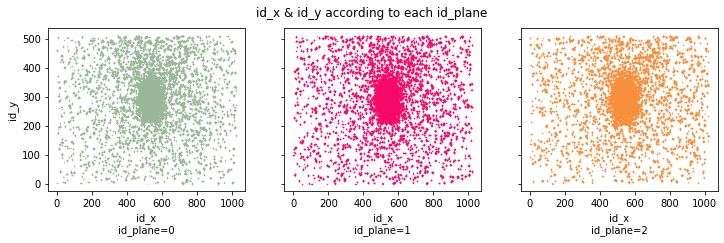

In [4]:
fig,ax = plt.subplots(1,3, sharey=True)
plt.suptitle("id_x & id_y according to each id_plane")
ax[0].scatter(df0['id_x'],df0['id_y'], s=0.05, c='#99B898')
ax[0].set_xlabel("id_x\nid_plane=0")
ax[0].set_ylabel("id_y")
ax[1].scatter(df1['id_x'],df1['id_y'], s=0.05, c='#F70969')
ax[1].set_xlabel("id_x\nid_plane=1")
ax[2].scatter(df2['id_x'],df2['id_y'], s=0.05, c='#F6903D')
ax[2].set_xlabel("id_x\nid_plane=2")
fig.set_size_inches(12,3)
plt.show()

* In here, we can see three graphs look similar.
* I assume that these graphs mean three-layer picture.
* So, I made 3D scatter plot to see them three-dimensionally.

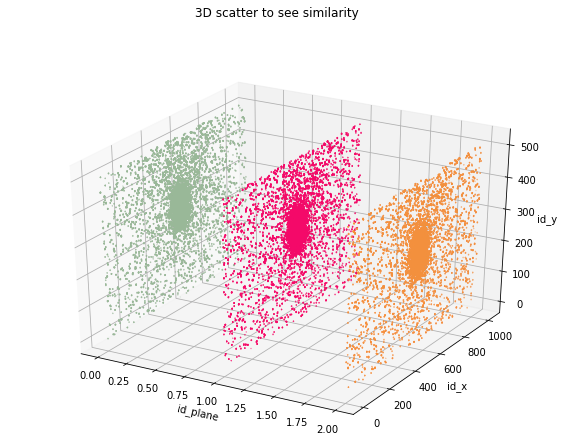

In [5]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df0['id_plane'],df0['id_x'],df0['id_y'], s=0.05,c='#99B898')
ax.scatter(df1['id_plane'],df1['id_x'],df1['id_y'], s=0.05,c='#F70969')
ax.scatter(df2['id_plane'],df2['id_x'],df2['id_y'], s=0.05,c='#F6903D')
ax.set_xlabel("id_plane")
ax.set_ylabel("id_x")
ax.set_zlabel("id_y")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

* After seeing above graph, I assume that these three types may mean 3kinds of ion.
* So I assume ``"Because the transmittance is different, it is used to predict cancer or tumor."``

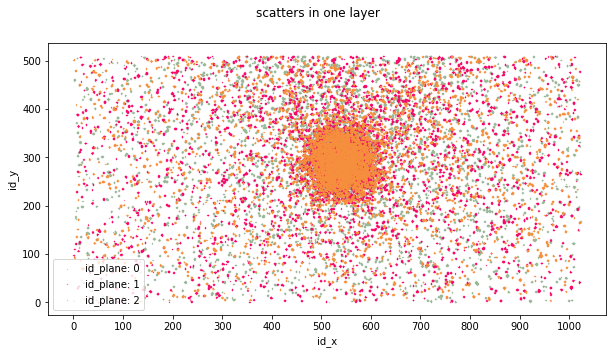

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df0['id_x'],df0['id_y'],c='#99B898',s=0.05, label="id_plane: 0")
plt.scatter(df1['id_x'],df1['id_y'],c='#F70969',s=0.05, label="id_plane: 1")
plt.scatter(df2['id_x'],df2['id_y'],c='#F6903D',s=0.05, label="id_plane: 2")
plt.suptitle("scatters in one layer")
plt.xlabel("id_x")
plt.xticks(np.arange(0,max(df['id_x']),step=100))
plt.ylabel("id_y")
plt.legend()
plt.show()

* We can see that scatters are widely distributed from (450,200) to (650,400)

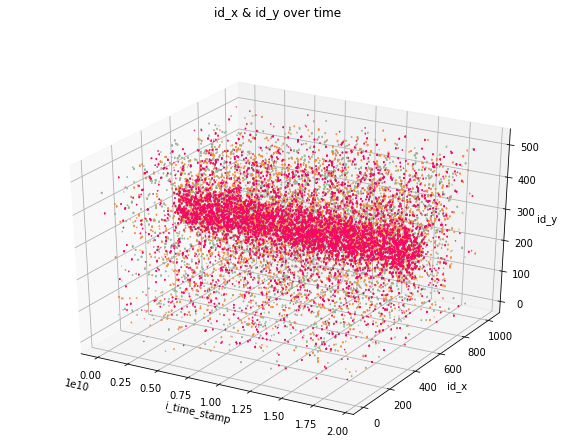

In [7]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df0['i_time_stamp'],df0['id_x'],df0['id_y'], s=0.05,c='#99B898')
ax.scatter(df1['i_time_stamp'],df1['id_x'],df1['id_y'], s=0.05,c='#F70969')
ax.scatter(df2['i_time_stamp'],df2['id_x'],df2['id_y'], s=0.05,c='#F6903D')
ax.set_xlabel("i_time_stamp")
ax.set_ylabel("id_x")
ax.set_zlabel("id_y")
plt.suptitle("id_x & id_y over time")
fig.set_size_inches(10,7)
plt.show()

* In here, we can see the bar shape which we can see in the above graph's center. The time pass, and the center scatters remain.

In [8]:
df_center = df[df['id_x'].between(450,650)]
df_center = df_center[df_center['id_y'].between(200,400)]
df_center.describe()

,id_plane,id_x,id_y,i_event,i_time_stamp
count,133003.000000,133003.000000,133003.000000,133003.000000,1.330030e+05
mean,0.993045,539.671586,292.700563,121127.942716,9.685325e+09
std,0.809517,37.259826,39.121212,68794.443927,5.503188e+09
min,0.000000,450.000000,200.000000,32.000000,2.160000e+04
25%,0.000000,513.000000,263.000000,62214.000000,4.975942e+09
50%,1.000000,539.000000,291.000000,124630.000000,9.967890e+09
75%,2.000000,564.000000,320.000000,177519.000000,1.419983e+10
max,2.000000,650.000000,400.000000,240306.000000,1.921583e+10


In [9]:
df_center0 = df_center[df_center['id_plane']==0]
df_center1 = df_center[df_center['id_plane']==1]
df_center2 = df_center[df_center['id_plane']==2]
print(df_center0.count())
print(df_center1.count())
print(df_center2.count())

id_plane        44045
id_x            44045
id_y            44045
i_event         44045
i_time_stamp    44045
dtype: int64
id_plane        45838
id_x            45838
id_y            45838
i_event         45838
i_time_stamp    45838
dtype: int64
id_plane        43120
id_x            43120
id_y            43120
i_event         43120
i_time_stamp    43120
dtype: int64


* In the center, ``id_plane = 0`` type has 44045 data. (44045 / 74595 = 59%)
* In the center, ``id_plane = 1`` type has 45838 data. (45838 / 75992 = 60.3%)
* In the center, ``id_plane = 2`` type has 43120 data. (43120 / 69551 = 62%)
* (200*200) / (1024*512) = 7.6% -> 60.4% data is in the 7.6% area
* There are each type data in the center, which are well-distributed.
* https://www.youtube.com/watch?v=pQyz1vHEBOM :</br>``01:05`` in this video, doctor can detect cancer with CT image.</br>
If I change above graph color into black-white, we can assume that the center point may indicate the cancer.
* I will examine more, using machine learning technique to get precise image.